## Creating Visualizations

### Loading and Installing Dependencies

In [1]:
library(pacman)

p_load(tidyverse, ggplot2, ggrepel)

### Loading the Current Nominate Data from Voteview.com

In [2]:
nom_dat <- read_csv("https://voteview.com/static/data/out/members/HSall_members.csv")

Rows: 50488 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): chamber, state_abbrev, bioname, bioguide_id
dbl (17): congress, icpsr, state_icpsr, district_code, party_code, occupancy...
lgl  (1): conditional

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Transforming the Member-Year NOMINATE Data into the Chamber-Year Data on Polarization

In [3]:
south <- c(40:49,51,53)
polar_dat <- nom_dat %>% 
    filter(congress>45 & 
           chamber != "President") %>%
    mutate( 
      year = 2*(congress-1) + 1789,
    ) %>%
    group_by(chamber,congress,year) %>% 
    summarize(
      party.mean.diff.d1 = mean(nominate_dim1[party_code==200],na.rm=T) - 
                           mean(nominate_dim1[party_code==100],na.rm=T),
      prop.moderate.d1 = mean(abs(nominate_dim1)<0.25,na.rm=T),
      prop.moderate.dem.d1 = mean(abs(nominate_dim1[party_code==100])<0.25,na.rm=T),
      prop.moderate.rep.d1 = mean(abs(nominate_dim1[party_code==200])<0.25,na.rm=T),
      overlap = (sum(nominate_dim1[party_code==200] <
                       max(nominate_dim1[party_code==100],na.rm=T),na.rm=T)  +
                 sum(nominate_dim1[party_code==100] >
                       min(nominate_dim1[party_code==200],na.rm=T),na.rm=T))/
                 (sum(!is.na(nominate_dim1[party_code==100]))+
                  sum(!is.na(nominate_dim1[party_code==200]))),
      chamber.mean.d1 = mean(nominate_dim1,na.rm=T),
      chamber.mean.d2 = mean(nominate_dim2,na.rm=T),
      dem.mean.d1 = mean(nominate_dim1[party_code==100],na.rm=T),
      dem.mean.d2 = mean(nominate_dim2[party_code==100],na.rm=T),
      rep.mean.d1 = mean(nominate_dim1[party_code==200],na.rm=T),
      rep.mean.d2 = mean(nominate_dim2[party_code==200],na.rm=T),
      north.rep.mean.d1 = mean(nominate_dim1[party_code==200 & 
                                             !(state_icpsr %in% south)],na.rm=T),    
      north.rep.mean.d2 = mean(nominate_dim2[party_code==200 & 
                                             !(state_icpsr %in% south)],na.rm=T),    
      south.rep.mean.d1 = mean(nominate_dim1[party_code==200 & 
                                              (state_icpsr %in% south)],na.rm=T),    
      south.rep.mean.d2 = mean(nominate_dim2[party_code==200 & 
                                             (state_icpsr %in% south)],na.rm=T),    
      north.dem.mean.d1 = mean(nominate_dim1[party_code==100 & 
                                              !(state_icpsr %in% south)],na.rm=T),    
      north.dem.mean.d2 = mean(nominate_dim2[party_code==100 & 
                                              !(state_icpsr %in% south)],na.rm=T),    
      south.dem.mean.d1 = mean(nominate_dim1[party_code==100 & 
                                              (state_icpsr %in% south)],na.rm=T),    
      south.dem.mean.d2 = mean(nominate_dim2[party_code==100 & 
                                              (state_icpsr %in% south)],na.rm=T),    
    ) 

`summarise()` has grouped output by 'chamber', 'congress'. You can override
using the `.groups` argument.


### Preview of Resulting Dataset

In [4]:
head(polar_dat)
write_csv(polar_dat,path="Political Polarization in US Congress (Non-Assorted).csv")
# IMPORTANT: Make sure to download the non-assorted file first!

chamber,congress,year,party.mean.diff.d1,prop.moderate.d1,prop.moderate.dem.d1,prop.moderate.rep.d1,overlap,chamber.mean.d1,chamber.mean.d2,⋯,rep.mean.d1,rep.mean.d2,north.rep.mean.d1,north.rep.mean.d2,south.rep.mean.d1,south.rep.mean.d2,north.dem.mean.d1,north.dem.mean.d2,south.dem.mean.d1,south.dem.mean.d2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
House,46,1879,0.7858825,0.1304348,0.1103448,0.06666667,0.000000000,-0.01894314,-0.04308361,⋯,0.3948963,-0.12807407,0.3980152,-0.127234848,0.2576667,-0.16500000,-0.3432532,-0.063924051,-0.4481212,-0.03189394
House,47,1881,0.7827138,0.1003236,0.1102941,0.02515723,0.000000000,0.02634304,-0.02570550,⋯,0.3877358,-0.05075472,0.3910867,-0.042993333,0.3318889,-0.18011111,-0.3326429,-0.058428571,-0.4610909,-0.07853030
House,48,1883,0.7244043,0.2163743,0.2758621,0.09600000,0.000000000,-0.06635380,-0.02984795,⋯,0.3774880,0.00182400,0.3840086,0.009155172,0.2934444,-0.09266667,-0.2814496,-0.008705426,-0.4610405,-0.12978378
House,49,1885,0.7493213,0.1475904,0.1818182,0.09090909,0.006060606,-0.04153313,-0.02931928,⋯,0.3836154,0.05334266,0.3886350,0.060036496,0.2690000,-0.09950000,-0.2958774,-0.088754717,-0.4570864,-0.09858025
House,50,1887,0.7648935,0.1610942,0.2058824,0.09150327,0.009287926,-0.00687538,-0.06596049,⋯,0.3946405,0.04689542,0.3934755,0.066027972,0.4113000,-0.22670000,-0.3003191,-0.210478723,-0.4567500,-0.17723684
House,51,1889,0.7952779,0.1186441,0.1715976,0.06521739,0.000000000,0.03135028,-0.06203955,⋯,0.4116685,0.09103804,0.4108023,0.100645349,0.4240833,-0.04666667,-0.3139551,-0.274168539,-0.4611000,-0.18063750


Warning message:
“The `path` argument of `write_csv()` is deprecated as of readr 1.4.0.
ℹ Please use the `file` argument instead.”


### Party Means on the Liberal-Conservative Dimension Over Time By Chamber

In [5]:
polar_dat_long <- polar_dat %>% gather(score,value,-chamber,-year,-congress)
labels <- c("dem.mean.d1"="DEM",
            "rep.mean.d1"="REP",
            "north.dem.mean.d1"="N. DEM",
            "south.dem.mean.d1"="S. DEM")

polarized_plot <- function(chamb) {
  pdatl <- polar_dat_long %>% 
                filter(chamber==chamb,
                       score %in% c("dem.mean.d1","rep.mean.d1",
                                    "north.dem.mean.d1","south.dem.mean.d1")) %>%
                mutate(party=labels[score]) %>%
                ungroup()
  
  gg <- ggplot(data=pdatl,
               aes(x=year,y=value,group=party,col=party)) +
               scale_x_continuous(expand = c(0.15, 0), 
                                 breaks=seq(1880, max(pdatl$year), by=8)) +
               geom_line() + geom_point(size=0.7) + 
               xlab("Year") + ylab("Liberal-Conservative") + 
               geom_text_repel(data=pdatl %>%
                    filter(year == min(year)),
                  aes(label = party, color = party),
                  size = 3,
                  nudge_x = -8,
                  point.padding = 0.1,
                  segment.color = NA,
                  show.legend = FALSE) +
              theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
              scale_color_manual(values=c("REP"="#c70828","DEM"="#1372ad",
                                         "N. DEM"="#6194F4",
                                         "S. DEM"="#81c4e4"),guide="none") +
              theme_bw()
  gg
}

## House

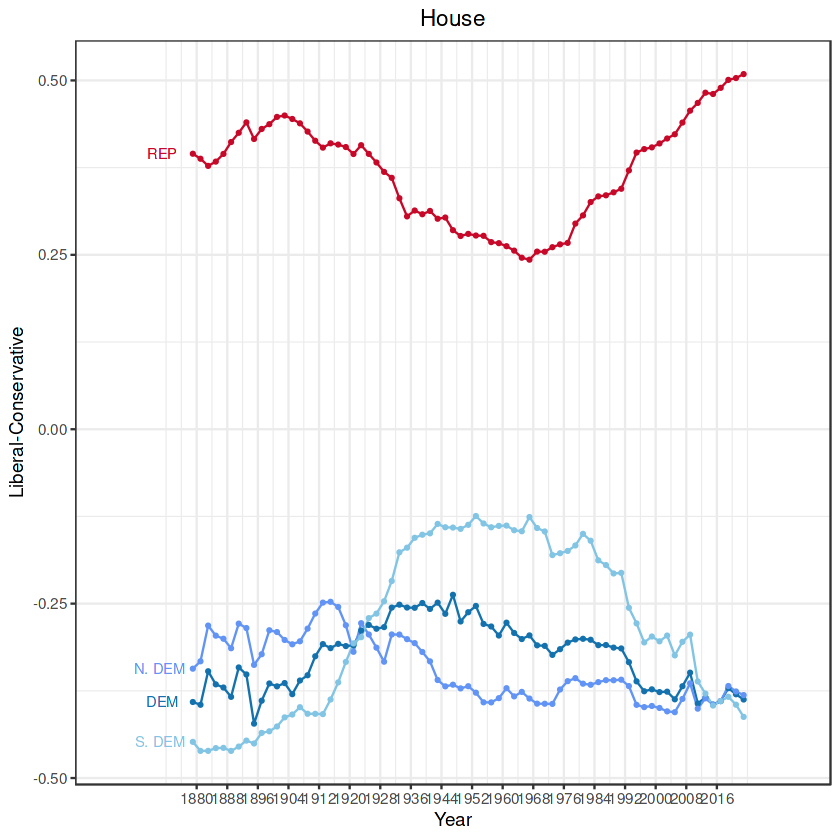

In [6]:
gg <- polarized_plot("House")
ggsave("voteview_house_party_means.png", plot=gg, device="png", 
       width=25, height=14, dpi=600)
gg + ggtitle("House") + theme(plot.title = element_text(hjust = 0.5))

## Senate

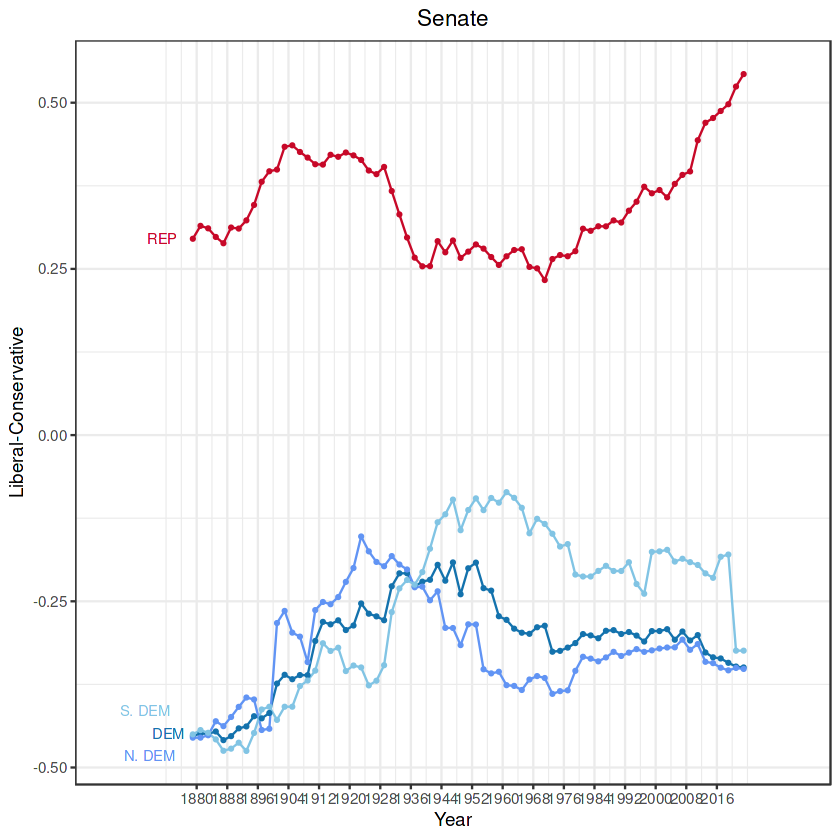

In [7]:
gg <- polarized_plot("Senate")
ggsave("voteview_senate_party_means.png", plot=gg, device="png", 
       width=25, height=14, dpi=300)
gg + ggtitle("Senate") + theme(plot.title = element_text(hjust = 0.5))

## Liberal-Conservative Partisan Polarization By Chamber

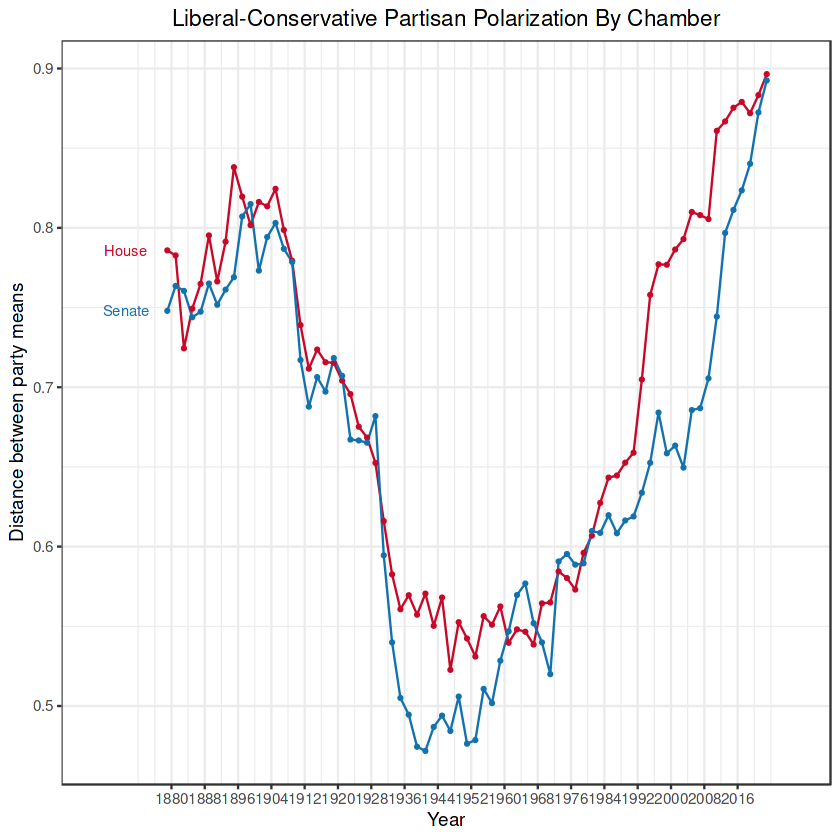

In [8]:
gg <- ggplot(polar_dat_long %>% 
              filter(score == "party.mean.diff.d1"),
              aes(x=year,y=value,group=chamber,col=chamber)) +
              scale_x_continuous(expand = c(0.10, 0), breaks=seq(1880,max(polar_dat_long$year),by=8)) +
              geom_line() + geom_point(size=0.7) + 
              xlab("Year") + ylab("Distance between party means") + 
              geom_text_repel(data=polar_dat_long %>%
                    ungroup() %>%
                    filter(year == min(year) & score=="party.mean.diff.d1"),
                  aes(label = chamber, color = chamber),
                  size = 3,
                  nudge_x = -10,
                  point.padding = 0.1,
                  segment.color = NA,
                  show.legend = FALSE) +
              theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
              scale_color_manual(values=c("House"="#c70828","Senate"="#1372ad"),guide="none") +
              theme_bw() 

ggsave("voteview_party_mean_diff.png", plot=gg, device="png", 
       width=25, height=14, dpi=300)
gg + ggtitle("Liberal-Conservative Partisan Polarization By Chamber") + theme(plot.title = element_text(hjust = 0.5))